Datasets Navigation

In [1]:
import os

# Set your dataset folder path
data_folder = '/content/drive/MyDrive/Multi Relational Datasets'

# List the files
os.listdir(data_folder)

['Crop_Data.xlsx.csv', 'Crop_recommendation.csv']

Load the Datasets

In [2]:
import pandas as pd

# File paths
file1 = '/content/drive/MyDrive/Multi Relational Datasets/Crop_Data.xlsx.csv'
file2 = '/content/drive/MyDrive/Multi Relational Datasets/Crop_recommendation.csv'

# Load first 5 rows of each
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print("📄 Crop_Data.xlsx.csv Preview:")
display(df1.head())

print("📄 Crop_recommendation.csv Preview:")
display(df2.head())

📄 Crop_Data.xlsx.csv Preview:


,temperature,humidity,ph,rainfall,label,Label_Num
0,20.879744,82.002744,6.502985,202.935536,rice,0
1,21.770462,80.319644,7.038096,226.655537,rice,0
2,23.004459,82.320763,7.840207,263.964248,rice,0
3,26.491096,80.158363,6.980401,242.864034,rice,0
4,20.130175,81.604873,7.628473,262.717340,rice,0


📄 Crop_recommendation.csv Preview:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Cleanind and prepare the data

In [10]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (optional - you can also fill them)
df.dropna(inplace=True)

# Encode categorical data (if needed)
df = pd.get_dummies(df, drop_first=True)

# View the shape
df.shape


N                    0
P                    0
K                    0
temperature          0
humidity             0
ph                   0
rainfall             0
label_banana         0
label_blackgram      0
label_chickpea       0
label_coconut        0
label_coffee         0
label_cotton         0
label_grapes         0
label_jute           0
label_kidneybeans    0
label_lentil         0
label_maize          0
label_mango          0
label_mothbeans      0
label_mungbean       0
label_muskmelon      0
label_orange         0
label_papaya         0
label_pigeonpeas     0
label_pomegranate    0
label_rice           0
label_watermelon     0
dtype: int64


(2200, 28)

Check the actual Column Name

In [11]:
# Display all column names
for col in df.columns:
    print(f"'{col}'")

'N'
'P'
'K'
'temperature'
'humidity'
'ph'
'rainfall'
'label_banana'
'label_blackgram'
'label_chickpea'
'label_coconut'
'label_coffee'
'label_cotton'
'label_grapes'
'label_jute'
'label_kidneybeans'
'label_lentil'
'label_maize'
'label_mango'
'label_mothbeans'
'label_mungbean'
'label_muskmelon'
'label_orange'
'label_papaya'
'label_pigeonpeas'
'label_pomegranate'
'label_rice'
'label_watermelon'


Define Feature and target

In [13]:
X = df.drop('label_rice', axis=1)
y = df['label_rice']



Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regresion

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:

              precision    recall  f1-score   support

       False       0.99      1.00      0.99       632
        True       0.92      0.82      0.87        28

    accuracy                           0.99       660
   macro avg       0.96      0.91      0.93       660
weighted avg       0.99      0.99      0.99       660



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       632
        True       1.00      0.86      0.92        28

    accuracy                           0.99       660
   macro avg       1.00      0.93      0.96       660
weighted avg       0.99      0.99      0.99       660



Visual Comparision

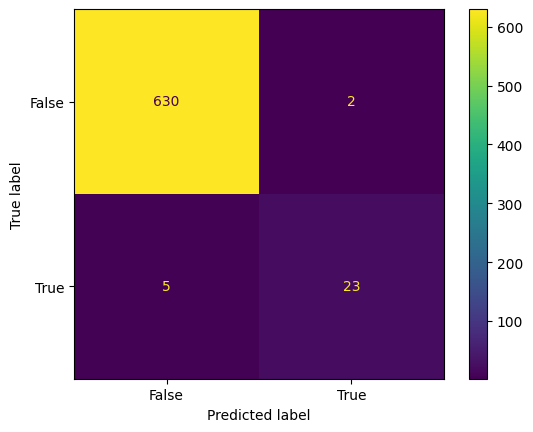

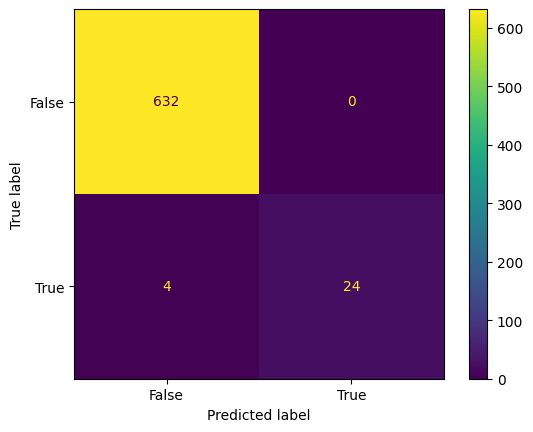

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)